##Importing DOGE Contract Data

In [13]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Master_DOGE.csv'
df = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(df.head())
# Print column data types
print(df.dtypes)
print(df.isna().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         Contract ID                                      Business Name  \
0      1232SA22P0086                STRATEGIC DIVERSITY INITIATIVES INC   
1     720BHA22S00052                                   ANGELA M ROBERTS   
2     2032H324F00060                                                NNA   
3  1333BJ24F00154002                           BOOZ ALLEN HAMILTON INC.   
4      12318725F0042  MANAGEMENT & ENGINEERING TECHNOLOGIES INTERNAT...   

  Unique Entity ID      Status Total Contract Ceiling  \
0     K8JLCTC7DWH3  Terminated                   $44K   
1     U8E8BMLHR9C1  Terminated                  $339K   
2     Y5FVFRWU9JJ7  Terminated                   $42K   
3     MBPHTU7Y9S65  Terminated                  $4.6M   
4     HMYJQTNC54D5  Terminated                   $38K   

                                         Description Award IDV Type  \
0  DIV

##Cleaning the Data

In [16]:
# Display the first few rows before cleaning
print("First few rows of the DataFrame (before cleaning):")
print(df.head())

# Print original data types
print("\nOriginal column data types:")
print(df.dtypes)

# 1. Convert Total Contract Ceiling to numeric (e.g., dollars)
def clean_contract_ceiling(value):
    if pd.isna(value):  # Handle NaN values
        return np.nan
    value = str(value).replace('$', '').strip()  # Remove '$'
    if 'K' in value:
        return float(value.replace('K', '')) * 1000  # Convert K to thousands
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000  # Convert M to millions
    else:
        return float(value)  # If no K or M, assume plain number

df['Total Contract Ceiling'] = df['Total Contract Ceiling'].apply(clean_contract_ceiling)

# 2. Convert Date Signed to datetime
df['Date Signed'] = pd.to_datetime(df['Date Signed'], format='%m/%d/%Y')

# Verify changes
print("\nFirst few rows of the DataFrame (after cleaning):")
print(df.head())

print("\nUpdated column data types:")
print(df.dtypes)

# Print count of null values per column (if any)
print("\nNull value counts per column:")
print(df.isnull().sum())

First few rows of the DataFrame (before cleaning):
         Contract ID                                      Business Name  \
0      1232SA22P0086                STRATEGIC DIVERSITY INITIATIVES INC   
1     720BHA22S00052                                   ANGELA M ROBERTS   
2     2032H324F00060                                                NNA   
3  1333BJ24F00154002                           BOOZ ALLEN HAMILTON INC.   
4      12318725F0042  MANAGEMENT & ENGINEERING TECHNOLOGIES INTERNAT...   

  Unique Entity ID      Status  Total Contract Ceiling  \
0     K8JLCTC7DWH3  Terminated                 44000.0   
1     U8E8BMLHR9C1  Terminated                339000.0   
2     Y5FVFRWU9JJ7  Terminated                 42000.0   
3     MBPHTU7Y9S65  Terminated               4600000.0   
4     HMYJQTNC54D5  Terminated                 38000.0   

                                         Description Award IDV Type  \
0  DIVERSITY AND INCLUSION CONSULTING AND TRAININ...           Task   
1  NEW 

##Fill Any Nulls for analysis

In [17]:
# Fill nulls in Unique Entity ID with 'UNKNOWN'
df['Unique Entity ID'] = df['Unique Entity ID'].fillna('UNKNOWN')

# Verify null counts
print("Null value counts after filling nulls in Unique Entity ID:")
print(df.isnull().sum())

Null value counts after filling nulls in Unique Entity ID:
Contract ID               0
Business Name             0
Unique Entity ID          0
Status                    0
Total Contract Ceiling    0
Description               0
Award IDV Type            0
Awarding Agency           0
Sub Contracting Agency    0
NAICS                     0
PSC                       0
Date Signed               0
dtype: int64


In [19]:
# Save the cleaned DataFrame to Google Drive
output_path = '/content/drive/My Drive/Cleaned_Master_DOGE.csv'
df.to_csv(output_path, index=False)

print(f"\nCleaned data saved to: {output_path}")


Cleaned data saved to: /content/drive/My Drive/Cleaned_Master_DOGE.csv


##Contract Ceiling Per Agency

In [22]:
# Sum Total Contract Ceiling by Awarding Agency
agency_totals = df.groupby('Awarding Agency')['Total Contract Ceiling'].sum().sort_values(ascending=False)
print("\nTotal Contract Ceiling by Awarding Agency:")
print(agency_totals)


Total Contract Ceiling by Awarding Agency:
Awarding Agency
EDUCATION, DEPARTMENT OF                                             931183000.0
HHS                                                                  472099000.0
HEALTH AND HUMAN SERVICES, DEPARTMENT OF                             318069600.0
DE                                                                   293494000.0
DOS                                                                  196390000.0
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION                        195000000.0
HOUSING AND URBAN DEVELOPMENT, DEPARTMENT OF                         178487000.0
ENVIRONMENTAL PROTECTION AGENCY                                      134000000.0
HOMELAND SECURITY, DEPARTMENT OF                                     128484000.0
LABOR, DEPARTMENT OF                                                  97092000.0
USDA                                                                  81340000.0
DOL                                              

##Contracts Signed Per Month


Number of Contracts Per Month:
Date Signed
2015-05      1
2018-07      1
2018-09      1
2019-02      1
2019-03      1
2019-07      1
2020-02      1
2020-03      3
2020-06      2
2020-08      1
2020-09      4
2020-10      1
2021-03      1
2021-04      1
2021-06      2
2021-07      3
2021-08      3
2021-09      4
2021-10      2
2021-11      1
2021-12      1
2022-01      3
2022-03      5
2022-05      1
2022-06      5
2022-07      5
2022-09     10
2022-12      1
2023-02      3
2023-03      6
2023-04      2
2023-05      4
2023-06      1
2023-07      4
2023-08     10
2023-09     38
2023-10      1
2023-11      2
2023-12      2
2024-01      1
2024-02      1
2024-03      9
2024-04     11
2024-05      6
2024-06      9
2024-07     14
2024-08     16
2024-09     51
2024-10      6
2024-11      8
2024-12     18
2025-01     58
2025-02    124
2026-07      1
Freq: M, Name: Contract ID, dtype: int64


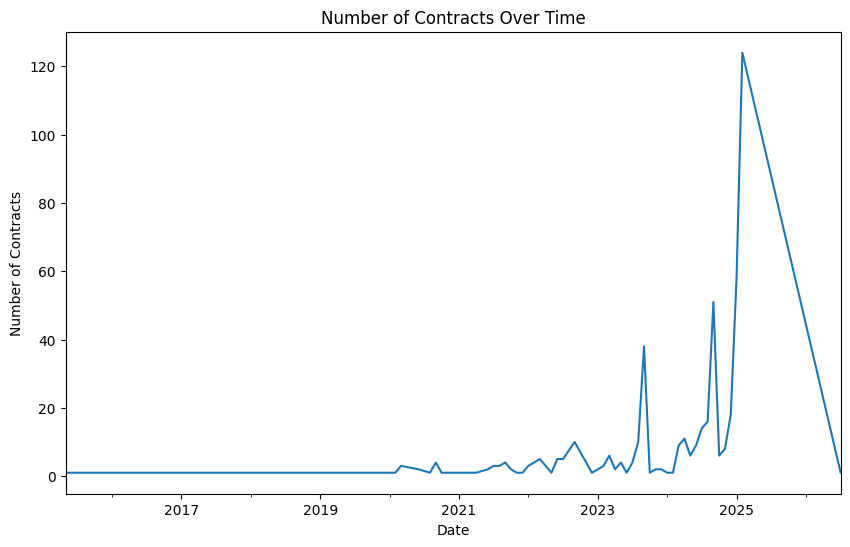

In [23]:
# Group contracts by Date Signed (monthly)
monthly_contracts = df.groupby(df['Date Signed'].dt.to_period('M'))['Contract ID'].count()
print("\nNumber of Contracts Per Month:")
print(monthly_contracts)

# Plot
monthly_contracts.plot(kind='line', figsize=(10, 6))
plt.title('Number of Contracts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Contracts')
plt.show()

##Contracts Per NAICS CODE (Business Type)

In [26]:
# Count contracts by NAICS
naics_counts = df['NAICS'].value_counts()
print("\nContracts by NAICS Code:")
print(naics_counts)



Contracts by NAICS Code:
NAICS
541611    116
541720     36
541519     21
339999     16
519290     13
         ... 
423321      1
423390      1
511120      1
711410      1
624229      1
Name: count, Length: 104, dtype: int64


In [30]:
df.head()


,Contract ID,Business Name,Unique Entity ID,Status,Total Contract Ceiling,Description,Award IDV Type,Awarding Agency,Sub Contracting Agency,NAICS,PSC,Date Signed
0,1232SA22P0086,STRATEGIC DIVERSITY INITIATIVES INC,K8JLCTC7DWH3,Terminated,44000.0,DIVERSITY AND INCLUSION CONSULTING AND TRAININ...,Task,USDA,ARS,541611,R799,2022-09-02
1,720BHA22S00052,ANGELA M ROBERTS,U8E8BMLHR9C1,Terminated,339000.0,NEW PSC TO SERVE AS A MANAGEMENT AND INTEGRATI...,Contract,USAID,BHA,812990,R497,2025-01-17
2,2032H324F00060,NNA,Y5FVFRWU9JJ7,Terminated,42000.0,NEWSPAPER AND MAGAZINE DELIVERY SERVICES,Task,Treasury,DO,492210,7630,2024-05-24
3,1333BJ24F00154002,BOOZ ALLEN HAMILTON INC.,MBPHTU7Y9S65,Terminated,4600000.0,ORGANIZATIONAL ASSESSMENT CONSULTING SERVICES-...,Task,DOC,USPTO,541611,R799,2024-06-21
4,12318725F0042,MANAGEMENT & ENGINEERING TECHNOLOGIES INTERNAT...,HMYJQTNC54D5,Terminated,38000.0,REGIONAL GENDER AND GABON PROGRAM MANAGER SERV...,Task,USDA,USFS,541715,AB11,2024-12-17


Saving Cleaned_Master_DOGE.csv to Cleaned_Master_DOGE.csv

Summary Statistics:
--------------------------------------------------
Total Number of Contracts: 472
Total Contract Value: $3,478,825,000.00
Average Contract Value: $7,370,391.95
Median Contract Value: $854,500.00
Date Range: 2015-05-14 to 2026-07-10


<ipython-input-43-7a4bb897bf53>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.resample('M', on='Date Signed').size()
<ipython-input-43-7a4bb897bf53>:27: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_avg = df.resample('Q', on='Date Signed')['Total Contract Ceiling'].mean()


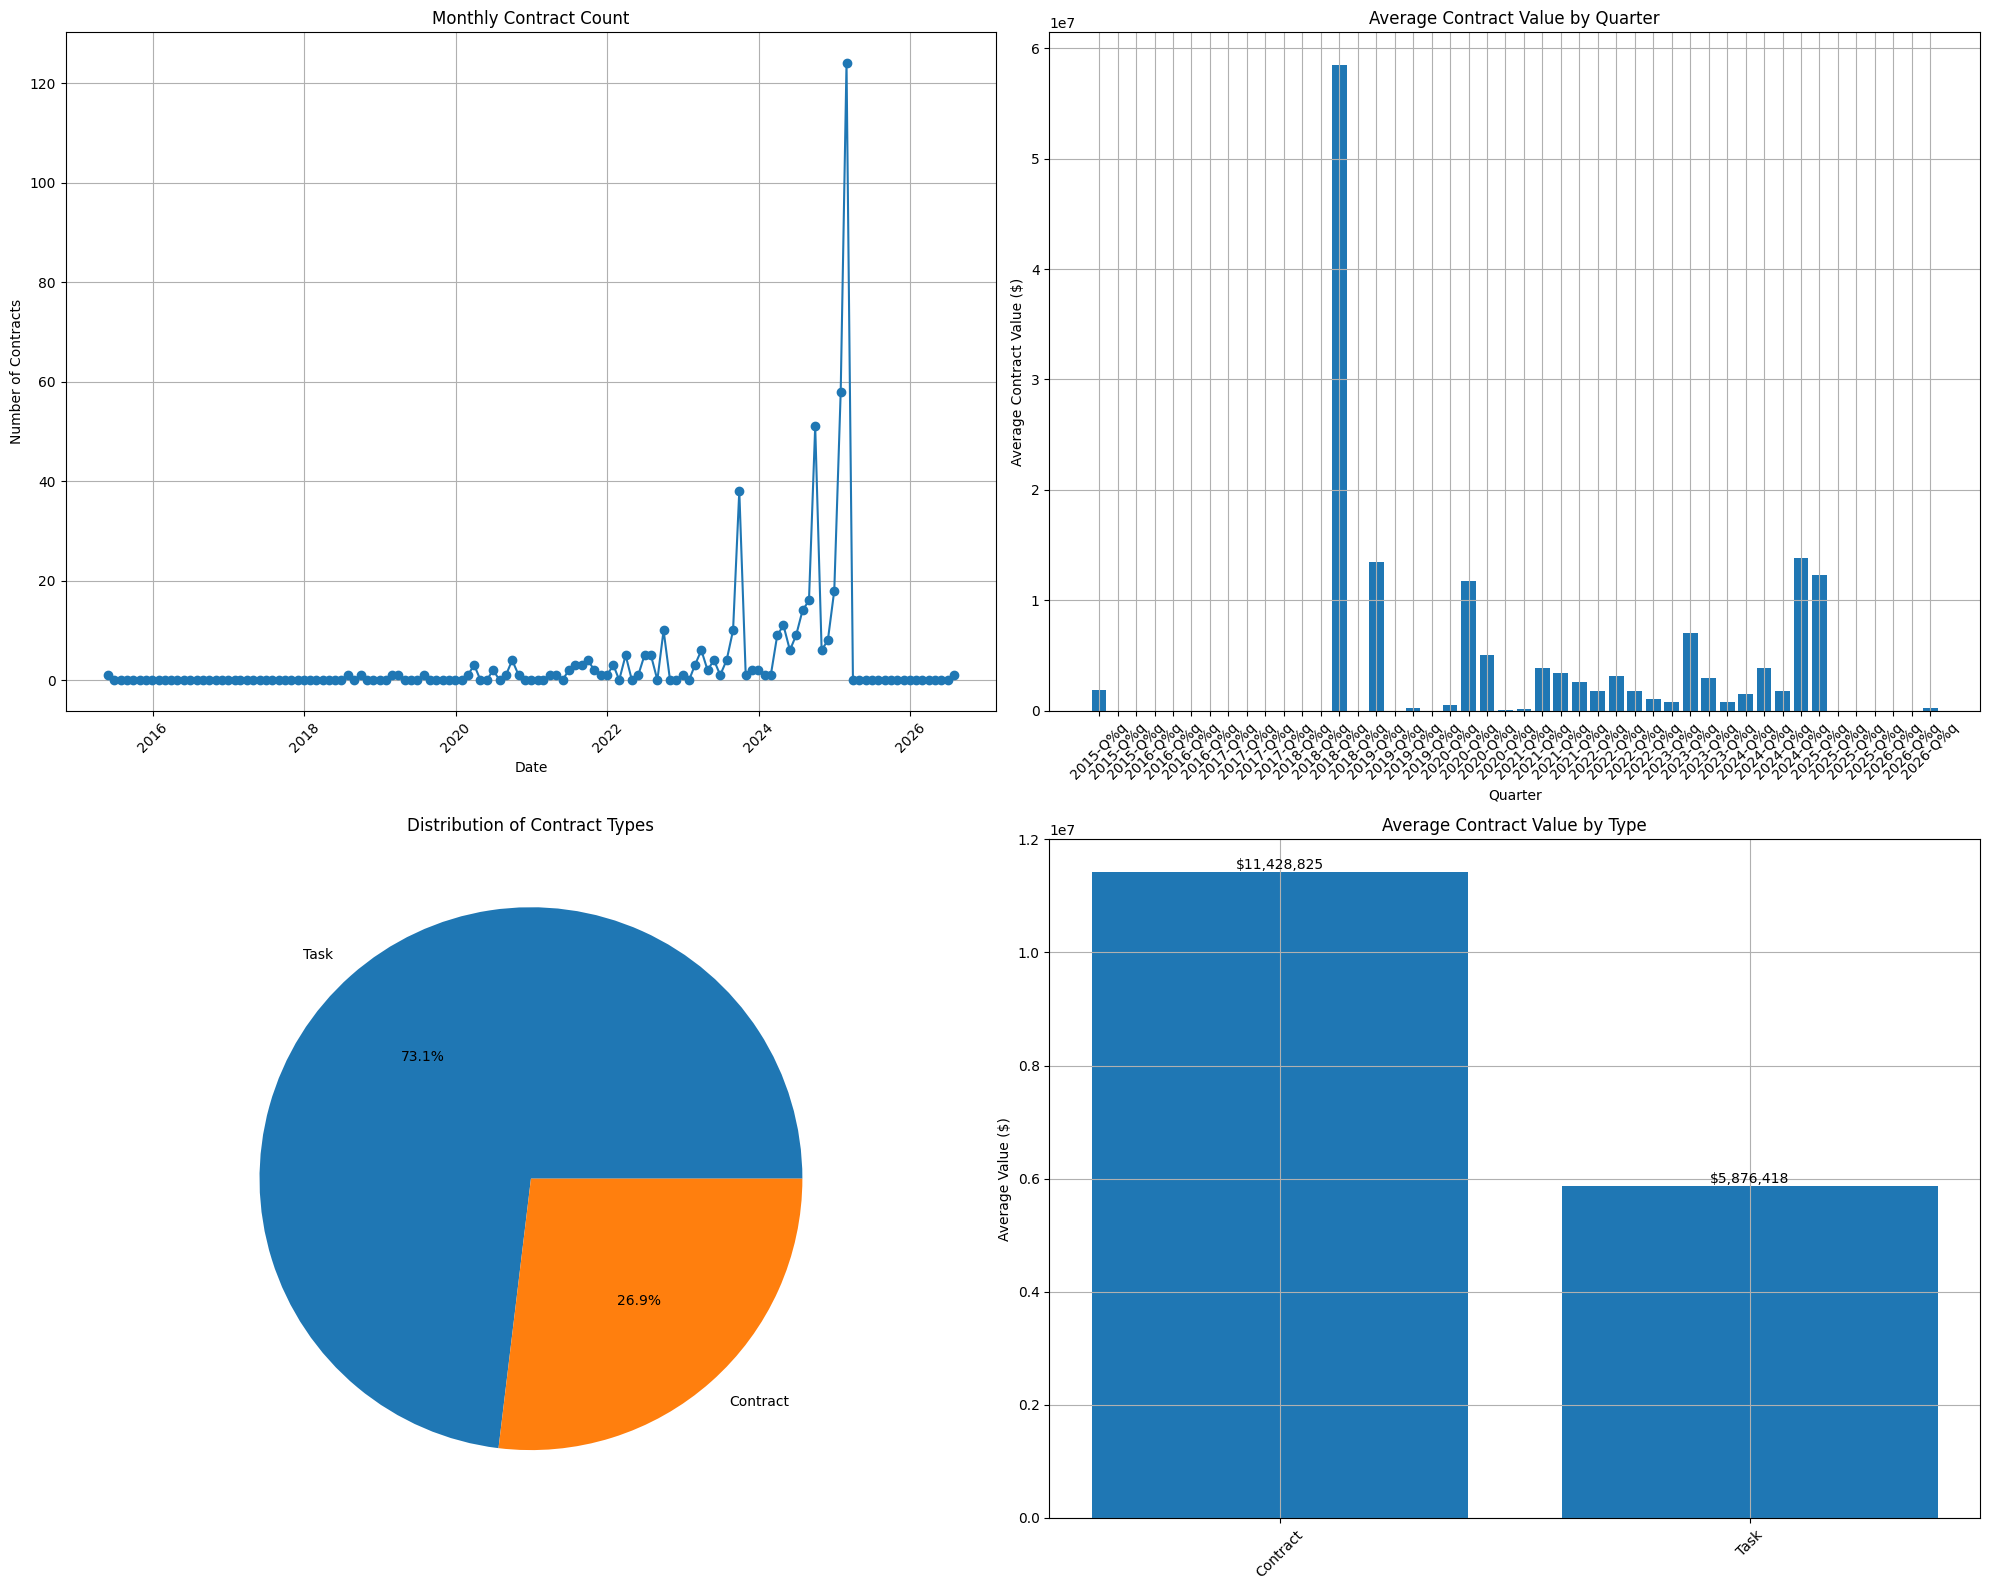


Top 10 Agencies by Total Contract Value:
                                               Total Value  Average Value  \
Awarding Agency                                                             
EDUCATION, DEPARTMENT OF                       931183000.0   2.909947e+07   
HHS                                            472099000.0   2.622772e+07   
HEALTH AND HUMAN SERVICES, DEPARTMENT OF       318069600.0   1.987935e+07   
DE                                             293494000.0   6.987952e+06   
DOS                                            196390000.0   2.003980e+06   
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION  195000000.0   9.750000e+07   
HOUSING AND URBAN DEVELOPMENT, DEPARTMENT OF   178487000.0   1.049924e+07   
ENVIRONMENTAL PROTECTION AGENCY                134000000.0   1.340000e+08   
HOMELAND SECURITY, DEPARTMENT OF               128484000.0   1.284840e+07   
LABOR, DEPARTMENT OF                            97092000.0   9.709200e+06   

                                 

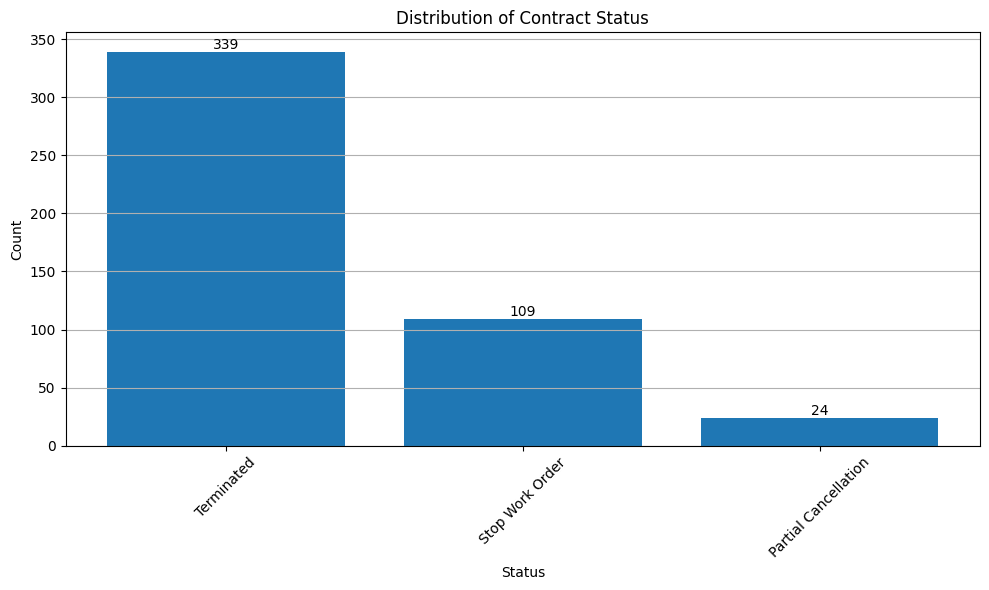

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from google.colab import files
uploaded = files.upload()
# Read and parse the CSV file with proper date handling
def load_and_prepare_data():
    df = pd.read_csv('Cleaned_Master_DOGE.csv')
    df['Date Signed'] = pd.to_datetime(df['Date Signed'])
    return df

def plot_temporal_analysis(df):
    # Create figure with 2x2 subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

    # 1. Monthly Contract Count
    monthly_counts = df.resample('M', on='Date Signed').size()
    ax1.plot(monthly_counts.index, monthly_counts.values, marker='o')
    ax1.set_title('Monthly Contract Count')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Number of Contracts')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True)

    # 2. Average Contract Value by Quarter
    quarterly_avg = df.resample('Q', on='Date Signed')['Total Contract Ceiling'].mean()
    ax2.bar(range(len(quarterly_avg)), quarterly_avg.values)
    ax2.set_title('Average Contract Value by Quarter')
    ax2.set_xlabel('Quarter')
    ax2.set_ylabel('Average Contract Value ($)')
    ax2.set_xticks(range(len(quarterly_avg)))
    ax2.set_xticklabels(quarterly_avg.index.strftime('%Y-Q%q'), rotation=45)
    ax2.grid(True)

    # 3. Contract Type Distribution
    type_counts = df['Award IDV Type'].value_counts()
    ax3.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%')
    ax3.set_title('Distribution of Contract Types')

    # 4. Average Contract Value by Type
    avg_by_type = df.groupby('Award IDV Type')['Total Contract Ceiling'].mean()
    bars = ax4.bar(range(len(avg_by_type)), avg_by_type.values)
    ax4.set_title('Average Contract Value by Type')
    ax4.set_ylabel('Average Value ($)')
    ax4.set_xticks(range(len(avg_by_type)))
    ax4.set_xticklabels(avg_by_type.index, rotation=45)
    ax4.grid(True)

    # Add value labels on the bars
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom', rotation=0)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

def analyze_agency_distribution(df):
    # Analyze top agencies by total contract value
    agency_analysis = df.groupby('Awarding Agency').agg({
        'Total Contract Ceiling': ['sum', 'mean', 'count']
    }).round(2)

    agency_analysis.columns = ['Total Value', 'Average Value', 'Contract Count']
    agency_analysis = agency_analysis.sort_values('Total Value', ascending=False)

    print("\nTop 10 Agencies by Total Contract Value:")
    print(agency_analysis.head(10))
    return agency_analysis

def analyze_status_trends(df):
    # Analyze contract status distribution
    plt.figure(figsize=(10, 6))
    status_counts = df['Status'].value_counts()
    bars = plt.bar(range(len(status_counts)), status_counts.values)

    # Add value labels on the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}',
                ha='center', va='bottom')

    plt.title('Distribution of Contract Status')
    plt.xlabel('Status')
    plt.ylabel('Count')
    plt.xticks(range(len(status_counts)), status_counts.index, rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

    return status_counts

def print_summary_statistics(df):
    print("\nSummary Statistics:")
    print("-" * 50)
    print(f"Total Number of Contracts: {len(df):,}")
    print(f"Total Contract Value: ${df['Total Contract Ceiling'].sum():,.2f}")
    print(f"Average Contract Value: ${df['Total Contract Ceiling'].mean():,.2f}")
    print(f"Median Contract Value: ${df['Total Contract Ceiling'].median():,.2f}")
    print(f"Date Range: {df['Date Signed'].min().strftime('%Y-%m-%d')} to {df['Date Signed'].max().strftime('%Y-%m-%d')}")

# Execute the analysis
if __name__ == "__main__":
    df = load_and_prepare_data()
    print_summary_statistics(df)
    plot_temporal_analysis(df)
    agency_analysis = analyze_agency_distribution(df)
    status_counts = analyze_status_trends(df)

Loading data...

Analyzing contract descriptions...

=== Word Cloud Visualization ===


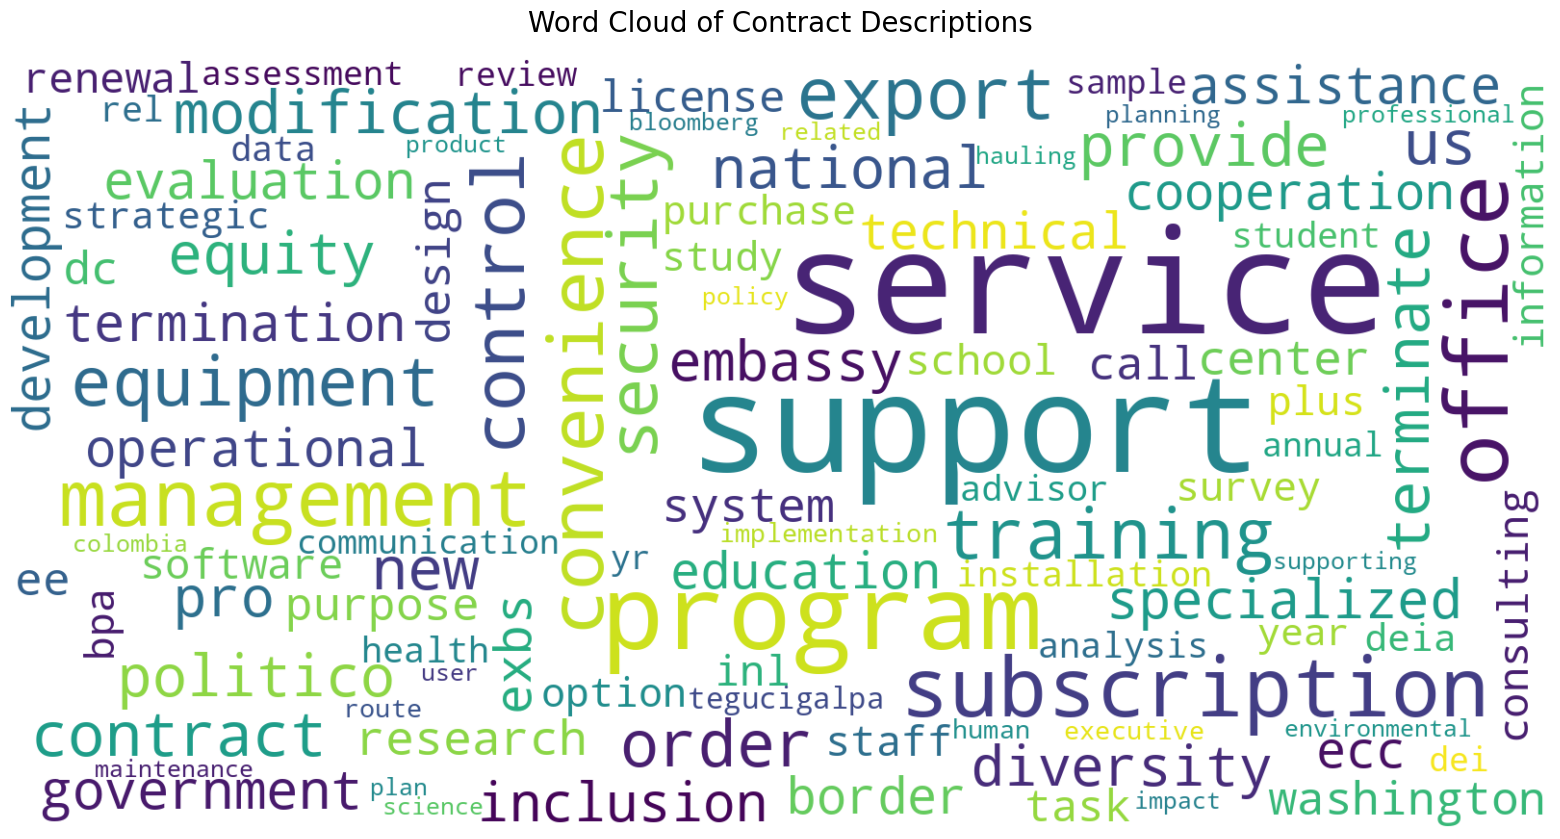


=== Description Length Analysis ===


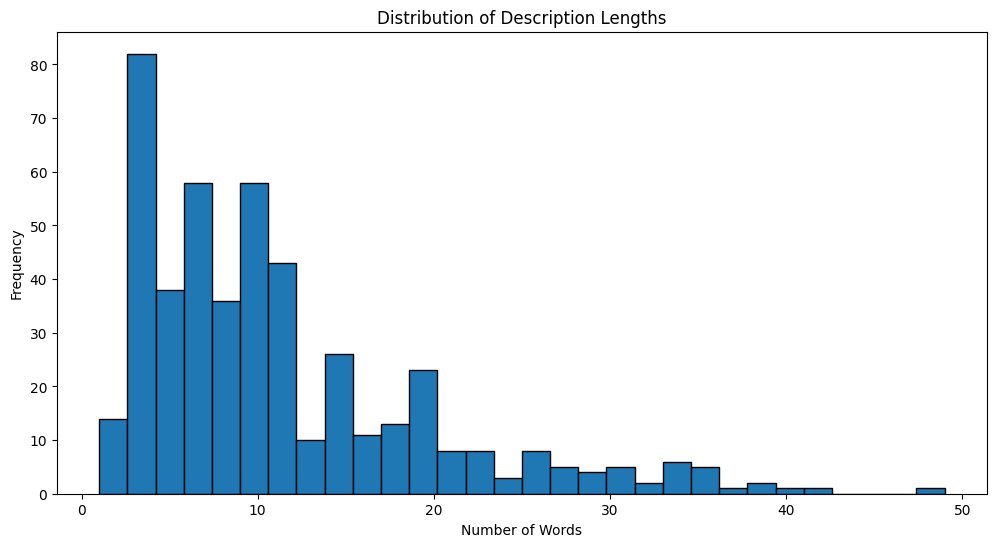


Description Length Statistics:
Average length: 11.2 words
Median length: 9.0 words
Max length: 49 words
Min length: 1 words

=== Common Words Analysis ===


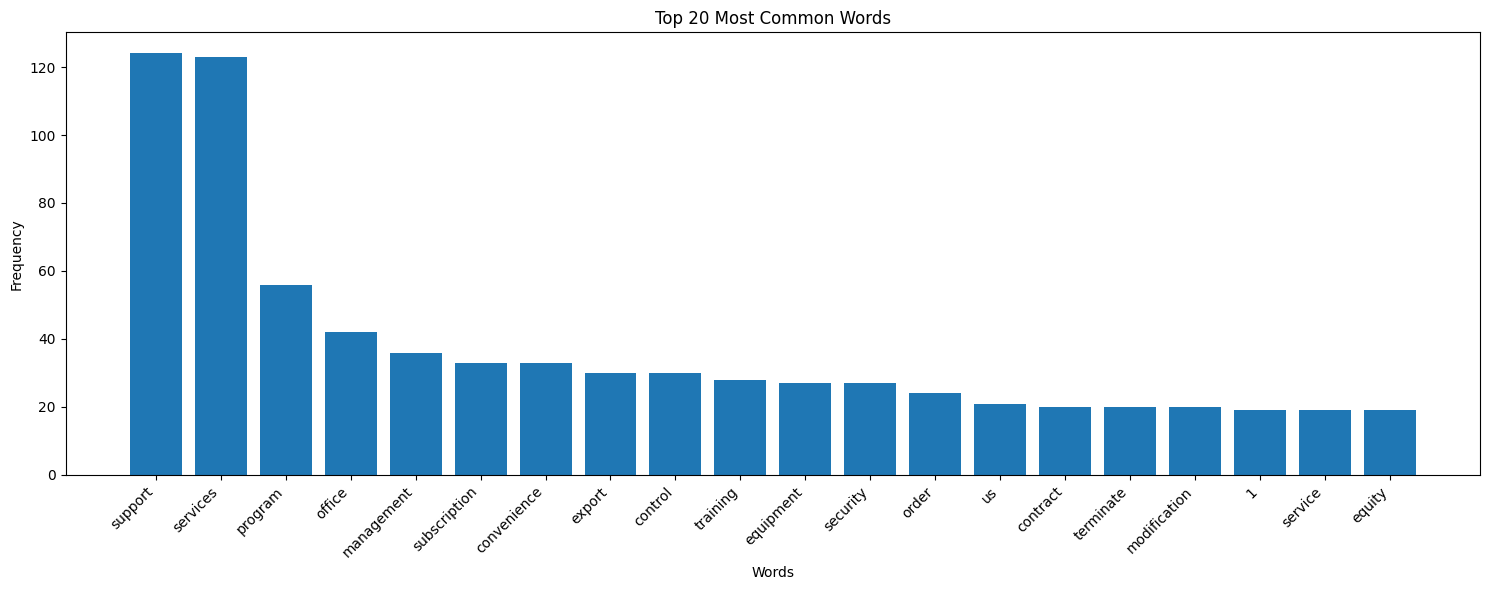


Top 20 most common words:
support: 124
services: 123
program: 56
office: 42
management: 36
subscription: 33
convenience: 33
export: 30
control: 30
training: 28
equipment: 27
security: 27
order: 24
us: 21
contract: 20
terminate: 20
modification: 20
1: 19
service: 19
equity: 19

=== Word Pattern Analysis ===


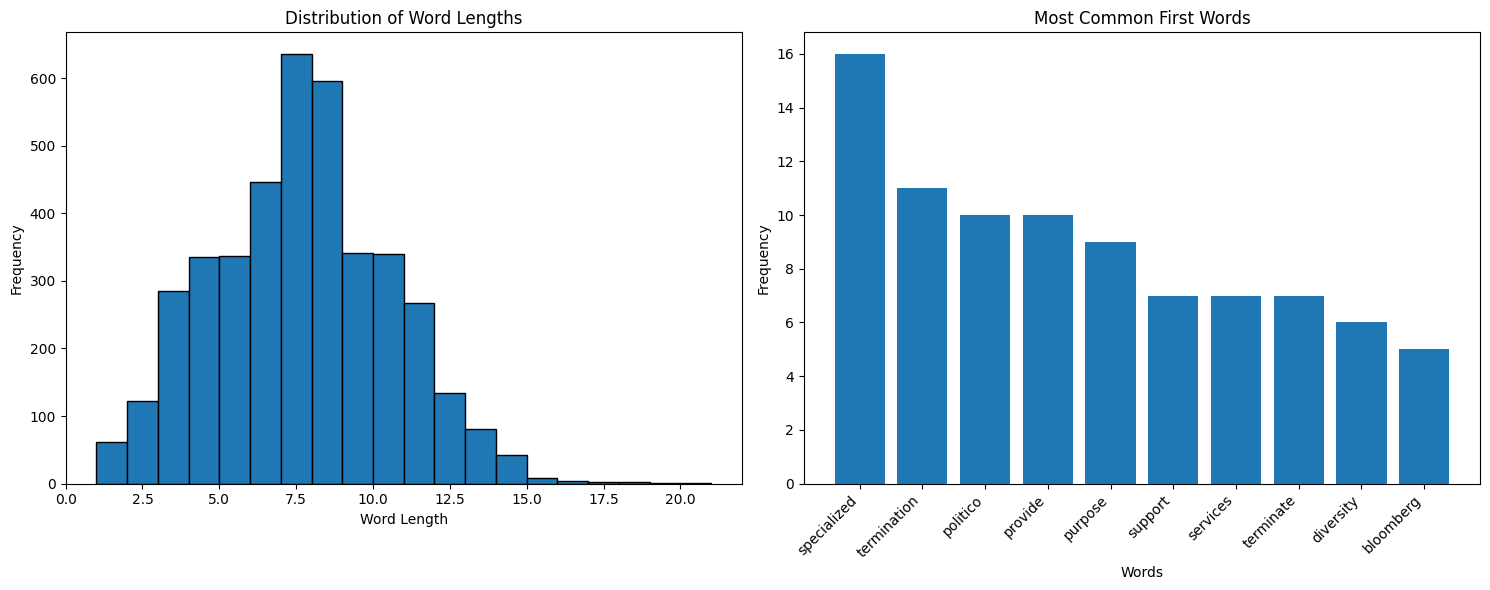


=== Common Phrases Analysis ===

Top 15 most common phrases:
support services: 30
export control: 30
politico pro: 18
support office: 18
us embassy: 18
specialized operational: 15
operational equipment: 15
equipment support: 15
office export: 15
control cooperation: 15
cooperation ecc: 15
ecc export: 15
control border: 15
border security: 15
security exbs: 15

Analysis complete!


In [48]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import warnings
warnings.filterwarnings('ignore')

class ContractAnalyzer:
    def __init__(self, descriptions):
        """Initialize with list of contract descriptions."""
        self.descriptions = descriptions
        # Common English stop words
        self.stop_words = {'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for',
                          'from', 'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on',
                          'that', 'the', 'to', 'was', 'were', 'will', 'with'}

    def clean_text(self, text):
        """Basic text cleaning."""
        if not isinstance(text, str):
            return []

        # Convert to lowercase
        text = text.lower()

        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Split into words
        words = text.split()

        # Remove stop words and empty strings
        words = [word for word in words
                if word not in self.stop_words and word.strip()]

        return words

    def analyze_description_lengths(self):
        """Analyze the length distribution of descriptions."""
        lengths = [len(str(desc).split()) for desc in self.descriptions]

        plt.figure(figsize=(12, 6))
        plt.hist(lengths, bins=30, edgecolor='black')
        plt.title('Distribution of Description Lengths')
        plt.xlabel('Number of Words')
        plt.ylabel('Frequency')
        plt.show()

        print("\nDescription Length Statistics:")
        print(f"Average length: {np.mean(lengths):.1f} words")
        print(f"Median length: {np.median(lengths):.1f} words")
        print(f"Max length: {max(lengths)} words")
        print(f"Min length: {min(lengths)} words")

    def analyze_common_words(self, top_n=20):
        """Analyze most common words in descriptions."""
        all_words = []
        for desc in self.descriptions:
            words = self.clean_text(str(desc))
            all_words.extend(words)

        # Calculate word frequencies
        word_freq = Counter(all_words)
        most_common = word_freq.most_common(top_n)

        # Plot top words
        plt.figure(figsize=(15, 6))
        words, counts = zip(*most_common)
        plt.bar(words, counts)
        plt.title(f'Top {top_n} Most Common Words')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

        print(f"\nTop {top_n} most common words:")
        for word, freq in most_common:
            print(f"{word}: {freq}")

        return word_freq

    def analyze_word_patterns(self):
        """Analyze patterns in word usage."""
        # Initialize counters
        word_lengths = []
        first_words = []

        for desc in self.descriptions:
            if isinstance(desc, str):
                words = self.clean_text(desc)
                if words:
                    word_lengths.extend([len(word) for word in words])
                    first_words.append(words[0])

        # Plot word length distribution
        plt.figure(figsize=(15, 6))

        plt.subplot(1, 2, 1)
        plt.hist(word_lengths, bins=20, edgecolor='black')
        plt.title('Distribution of Word Lengths')
        plt.xlabel('Word Length')
        plt.ylabel('Frequency')

        # Plot most common first words
        first_word_freq = Counter(first_words).most_common(10)
        words, counts = zip(*first_word_freq)

        plt.subplot(1, 2, 2)
        plt.bar(words, counts)
        plt.title('Most Common First Words')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel('Words')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    def analyze_phrases(self, top_n=10):
        """Analyze common two-word phrases."""
        all_phrases = []

        for desc in self.descriptions:
            if isinstance(desc, str):
                words = self.clean_text(desc)
                # Create two-word phrases
                phrases = [' '.join(words[i:i+2]) for i in range(len(words)-1)]
                all_phrases.extend(phrases)

        # Get most common phrases
        phrase_freq = Counter(all_phrases)

        print(f"\nTop {top_n} most common phrases:")
        for phrase, count in phrase_freq.most_common(top_n):
            print(f"{phrase}: {count}")

        return phrase_freq

    def generate_word_cloud(self, max_words=100, width=1600, height=800):
        """Generate and display word cloud."""
        # Combine all descriptions
        all_text = ' '.join([' '.join(self.clean_text(str(desc)))
                           for desc in self.descriptions])

        # Create WordCloud object
        wordcloud = WordCloud(
            width=width,
            height=height,
            max_words=max_words,
            background_color='white',
            colormap='viridis',
            collocations=False,  # Don't include bigrams
            min_font_size=10,
            max_font_size=150
        ).generate(all_text)

        # Display the word cloud
        plt.figure(figsize=(20,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Contract Descriptions', fontsize=20, pad=20)
        plt.show()

def main():
    # Read the CSV file
    print("Loading data...")
    df = pd.read_csv('Cleaned_Master_DOGE.csv')

    # Create analyzer instance
    analyzer = ContractAnalyzer(df['Description'].dropna())

    print("\nAnalyzing contract descriptions...")

    # 1. Generate word cloud
    print("\n=== Word Cloud Visualization ===")
    analyzer.generate_word_cloud(max_words=100)

    # 2. Analyze description lengths
    print("\n=== Description Length Analysis ===")
    analyzer.analyze_description_lengths()

    # 3. Analyze common words
    print("\n=== Common Words Analysis ===")
    analyzer.analyze_common_words(top_n=20)

    # 4. Analyze word patterns
    print("\n=== Word Pattern Analysis ===")
    analyzer.analyze_word_patterns()

    # 5. Analyze phrases
    print("\n=== Common Phrases Analysis ===")
    analyzer.analyze_phrases(top_n=15)

    print("\nAnalysis complete!")

if __name__ == "__main__":
    main()